# MazeAlgo_main

In [1]:
import MazeGen as mg
import ipywidgets as widgets

## General maze 

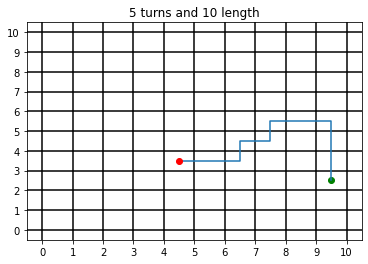

Algorithm converged.
Number of turns: 5
Path length: 10
Number of iterations: 1
Execution time: 0.16 seconds


In [2]:
numTurns = 5
pathLength=10
mg.genMaze(numTurns=numTurns, pathLength=pathLength)

## More complicated maze with more iterations

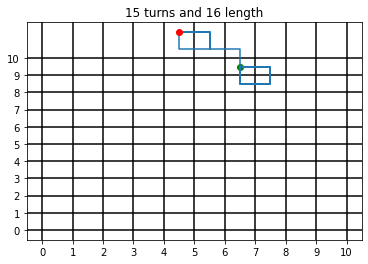

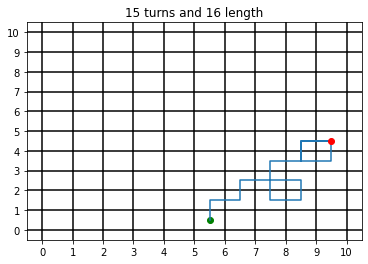

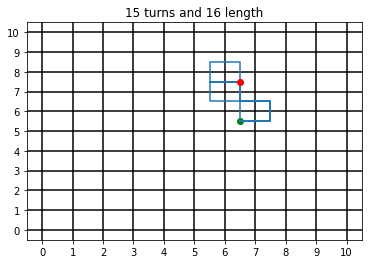

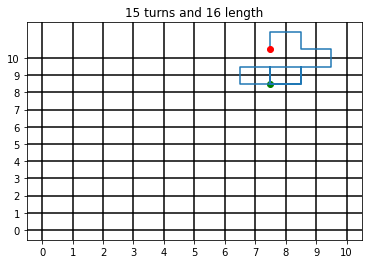

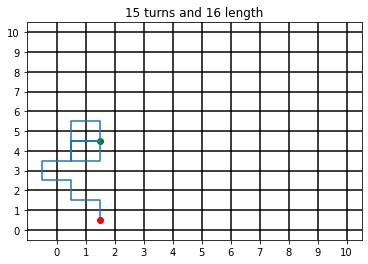

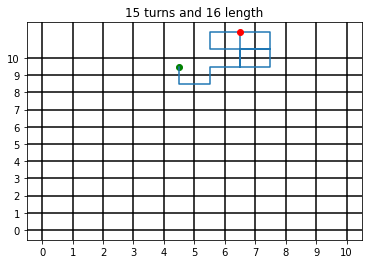

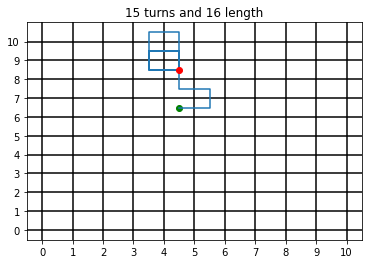

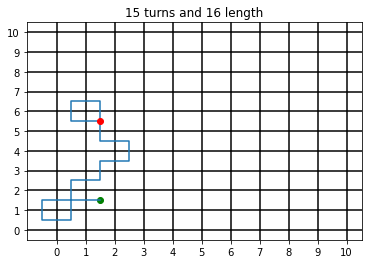

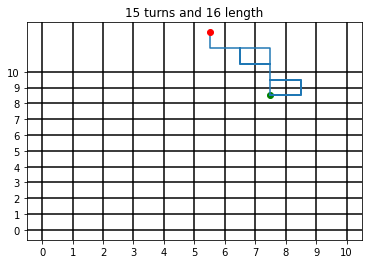

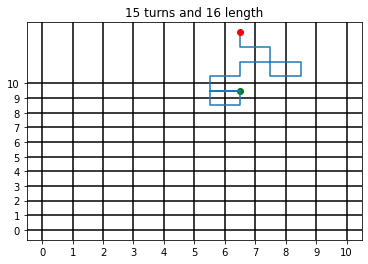

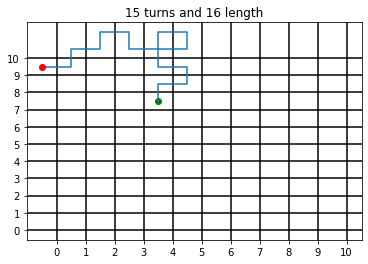

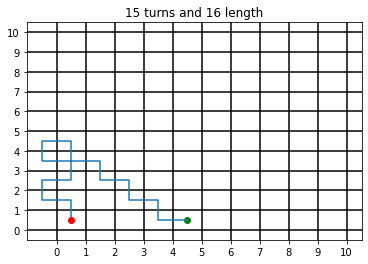

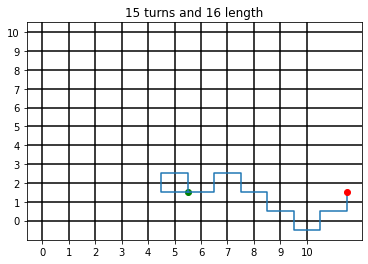

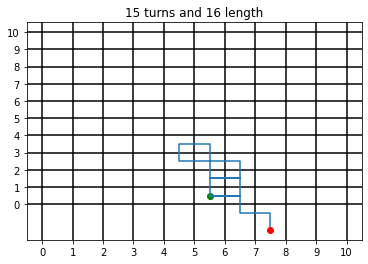

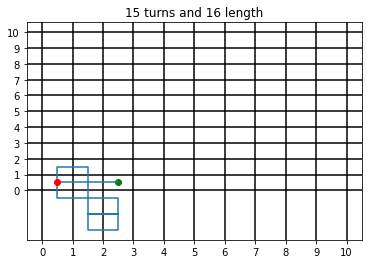

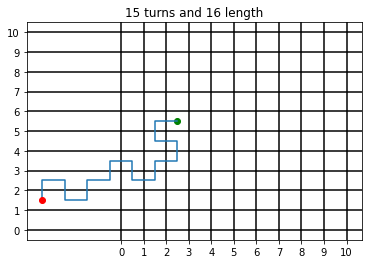

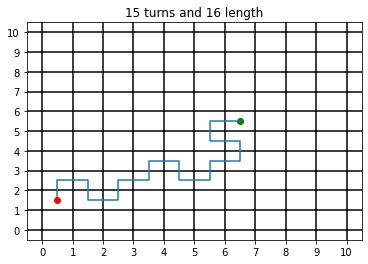

Algorithm converged.
Number of turns: 15
Path length: 16
Number of iterations: 16
Execution time: 2.60 seconds


In [3]:
numTurns=15
pathLength=16
mg.genMaze(numTurns=numTurns, pathLength=pathLength, maxIter=1000)

## Maze that isn't square 

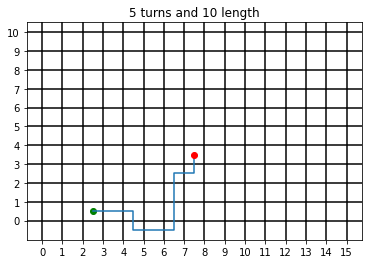

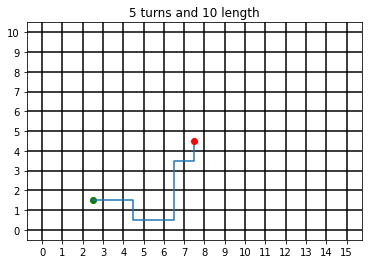

Algorithm converged.
Number of turns: 5
Path length: 10
Number of iterations: 1
Execution time: 0.31 seconds


In [4]:
numTurns=5
pathLength = 10
gridX=15
mg.genMaze(numTurns=numTurns, pathLength=pathLength, xMax=gridX)

## Widget input

In [5]:
_ = widgets.interact(mg.genMaze, numTurns = (0,15,1), pathLength=(1,20,1)) 

interactive(children=(IntSlider(value=7, description='numTurns', max=15), IntSlider(value=10, description='pat…